In [1]:
using AtomsIO
using JSON3
using DataFrames
using Statistics
using CairoMakie

In [ ]:
file = joinpath(@__DIR__, "trajectory_combined.json")
traj = JSON3.read(file)
df = DataFrame()
for state in traj[1:(end-1)]
    println(state)
    row = (;
        theta = state["theta"],
        time = state["time"],
        loss = state["loss"],
        # grad = state["grad"],
        Si   = state["preds"]["Si"],
        NaCl = state["preds"]["NaCl"],
        Al   = state["preds"]["Al"],
        V    = state["preds"]["V"],
    )
    push!(df, row)
end
df

{
   "theta": [
              0.804,
              0.21951497276451704
            ],
    "time": "2025-05-19T12:14:07.263",
   "preds": {
                 "Al": 7.633597991133098,
               "NaCl": 10.767919650605876,
                 "Si": 10.33541849329538,
                  "V": 5.666090606116655
            },
    "grad": [
              0.0006851745589024886,
              0.001231755927860391
            ],
    "loss": 0.0001865760768031547
}
{
   "theta": [
              0.8033148254410976,
              0.21828321683665663
            ],
    "time": "2025-05-19T12:29:04.849",
   "preds": {
                 "Al": 7.632628117675072,
               "NaCl": 10.766232490989921,
                 "Si": 10.334446446175145,
                  "V": 5.665216807888824
            },
    "grad": [],
    "loss": 0.0001845840377703045
}
{
   "theta": [
              0.8033148254410976,
              0.21828321683665663
            ],
    "time": "2025-05-19T13:08:27.895",
   "preds": {
 

Row,theta,time,loss,Si,NaCl,Al,V
,Array…,String,Float64,Float64,Float64,Float64,Float64
1,"[0.804, 0.219515]",2025-05-19T12:14:07.263,0.000186576,10.3354,10.7679,7.6336,5.66609
2,"[0.803315, 0.218283]",2025-05-19T12:29:04.849,0.000184584,10.3344,10.7662,7.63263,5.66522
3,"[0.803315, 0.218283]",2025-05-19T13:08:27.895,0.000184584,10.3344,10.7662,7.63263,5.66522
4,"[0.743829, 0.111111]",2025-05-19T13:35:03.345,0.000150801,10.2448,10.5468,7.55895,5.5778
5,"[0.743829, 0.111111]",2025-05-19T14:13:13.212,0.000150801,10.2448,10.5468,7.55895,5.5778
6,"[0.774548, 0.167255]",2025-05-19T14:39:25.085,0.000127078,10.293,10.6829,7.59399,5.62665
7,"[0.774548, 0.167255]",2025-05-19T15:16:44.723,0.000127078,10.293,10.6829,7.59399,5.62665
8,"[0.766833, 0.153699]",2025-05-19T15:37:05.628,0.000121987,10.2816,10.6551,7.58495,5.61554
9,"[0.766833, 0.153699]",2025-05-19T16:15:32.946,0.000121987,10.2816,10.6551,7.58495,5.61554


In [3]:
println(Vector.(df.theta))

[[0.804, 0.21951497276451704], [0.8033148254410976, 0.21828321683665663], [0.8033148254410976, 0.21828321683665663], [0.7438291066843512, 0.11111146536069058], [0.7438291066843512, 0.11111146536069058], [0.7745476107750928, 0.16725469304195512], [0.7745476107750928, 0.16725469304195512], [0.7668327692602528, 0.15369898979269744], [0.7668327692602528, 0.15369898979269744], [0.7631794877791771, 0.14769154789846003], [0.7631794877791771, 0.14769154789846003], [0.763293113065186, 0.14829814611901523], [0.763293113065186, 0.14829814611901523], [0.7625356770783898, 0.15106285536633143], [0.7625356770783898, 0.15106285536633143], [0.7584763791410856, 0.1559085107218], [0.7584763791410856, 0.1559085107218], [0.7428398302505825, 0.1671701692559504], [0.7428398302505825, 0.1671701692559504], [0.6713012612563571, 0.2082576725722106], [0.6713012612563571, 0.2082576725722106], [0.6713012612563571, 0.2082576725722106], [0.6709216155884424, 0.20787892373094077], [0.6709216155884424, 0.207878923730940

In [4]:
df.loss

63-element Vector{Float64}:
 0.0001865760768031547
 0.0001845840377703045
 0.0001845840377703045
 0.00015080082751968527
 0.00015080082751968527
 0.0001270778984490696
 0.0001270778984490696
 0.00012198726882477529
 0.00012198726882477529
 0.00012147955859181662
 ⋮
 7.762111190449684e-5
 7.762111190449684e-5
 7.762111190449684e-5
 7.762111190449684e-5
 7.762111190449684e-5
 7.762111190449684e-5
 7.762111190449684e-5
 7.762111190449684e-5
 7.762111190449684e-5

In [5]:
idx = argmin(df.loss)
@show idx
@show df.loss[idx]
@show df.theta[idx]

idx = 49
df.loss[idx] = 7.760905870896484e-5
df.theta[idx] = [0.5274266054802829, 0.2225734371774011]


2-element JSON3.Array{Float64, Base.CodeUnits{UInt8, String}, SubArray{UInt64, 1, Vector{UInt64}, Tuple{UnitRange{Int64}}, true}}:
 0.5274266054802829
 0.2225734371774011

In [6]:
include(joinpath(@__DIR__, "../../sol58lc/load.jl"))

# Load training set
data_path = joinpath(@__DIR__, "../../sol58lc/structures")
trainset = [
    "Si_diamond",
    # "GaAs_b3",
    "NaCl_b1",
    "Al_fcc",
    "V_bcc",
]
files_train = ["$x.extxyz" for x in trainset]
x_train = map(files_train) do file
    path = joinpath(data_path, file)
    system = load_system(path)
    convert_system_to_case(system)
end
a0_exp = Dict(case().name => case().a0_exp for case in x_train)

Dict{String, Float64} with 4 entries:
  "Al"   => 7.59481
  "NaCl" => 10.5163
  "Si"   => 10.2461
  "V"    => 5.71453

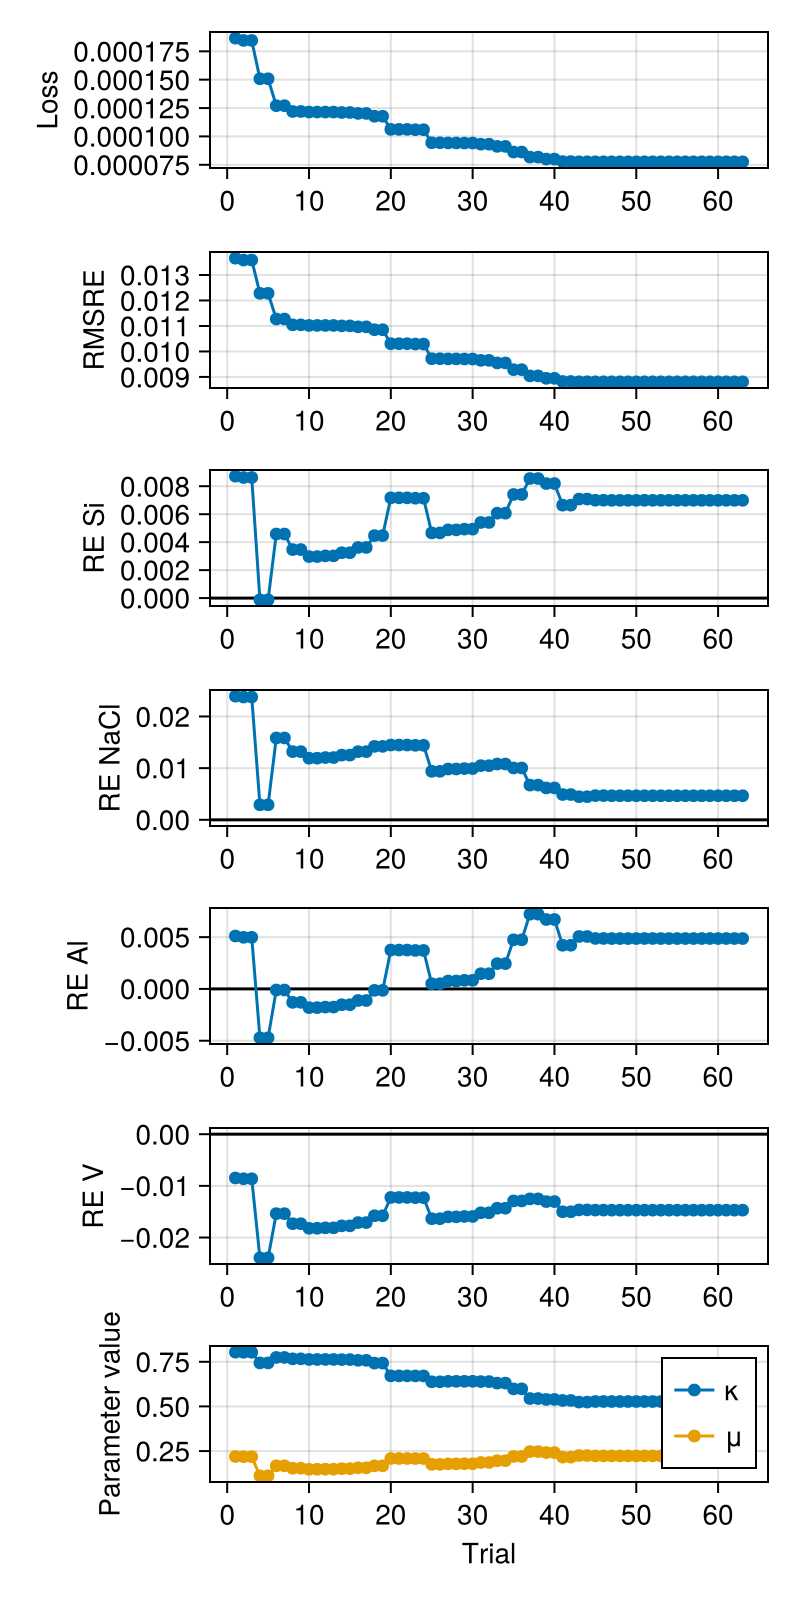

In [7]:
let κ = getindex.(df.theta, 1)
    μ = getindex.(df.theta, 2)
    fig = Figure(size=(400, 800))

    ax = Makie.Axis(fig[1,1], ylabel="Loss")
    scatterlines!(ax, df.loss)

    ax = Makie.Axis(fig[end+1,1], ylabel="RMSRE")
    scatterlines!(ax, sqrt.(df.loss))

    names = [:Si, :NaCl, :Al, :V]
    for name in names
        ax = Makie.Axis(fig[end+1,1], ylabel="RE $name")
        a0 = a0_exp[String(name)]
        rel_err = (df[:, name] .- a0) ./ a0
        hlines!(ax, [0.], color=:black)
        scatterlines!(ax, rel_err)
        # ylims!(ax, (-0.02, 0.02))
    end

    ax = Makie.Axis(fig[end+1,1], xlabel="Trial", ylabel="Parameter value")
    scatterlines!(ax, κ, label="κ")
    scatterlines!(ax, μ, label="μ")
    axislegend(ax)    

    fig
end

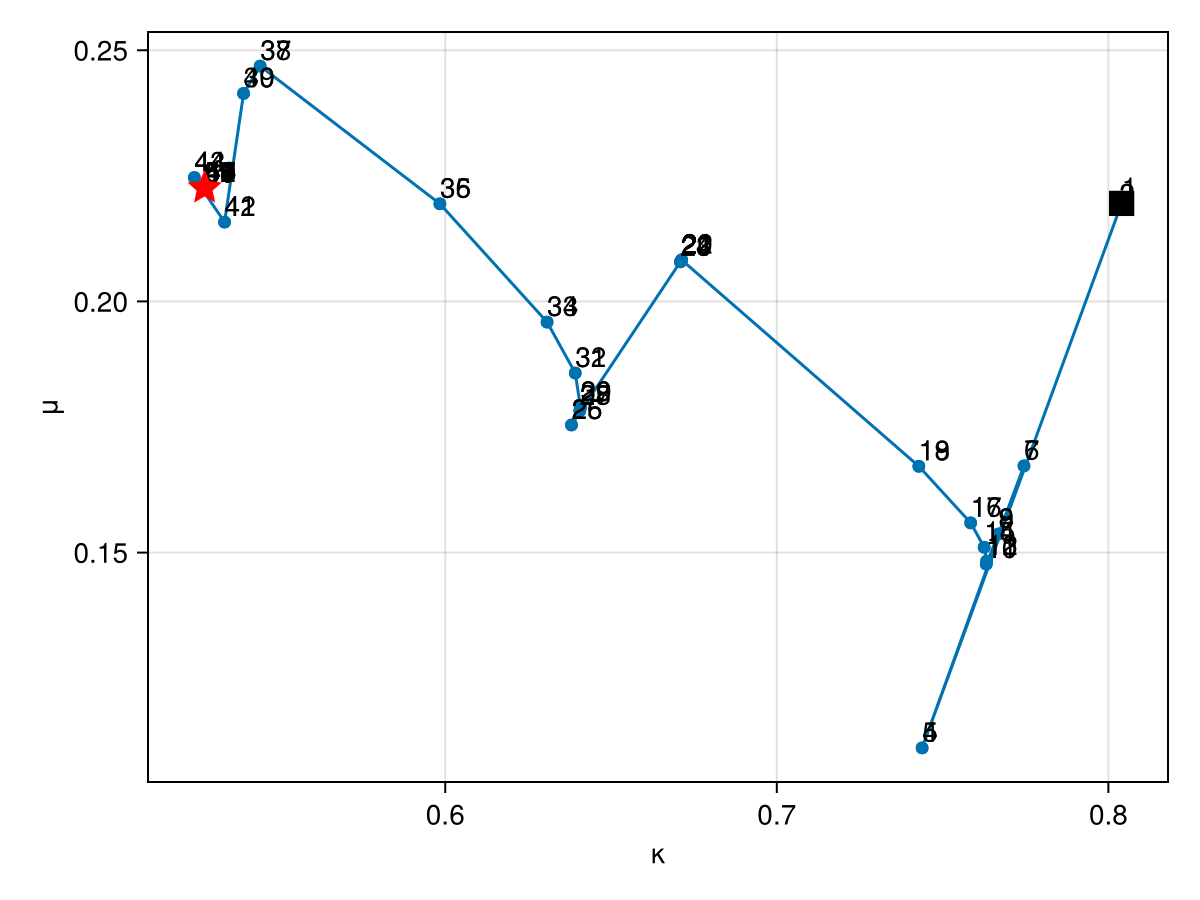

In [8]:
let κ = getindex.(df.theta, 1)
    μ = getindex.(df.theta, 2)
    fig = Figure()
    ax = Makie.Axis(fig[1,1], xlabel="κ", ylabel="μ")
    scatterlines!(ax, κ, μ)
    scatter!(ax, [κ[1]], [μ[1]], label="Init", color=:black, marker=:rect, markersize=20)
    for i in eachindex(κ)
        text!(ax, κ[i], μ[i], text="$i")
    end
    scatter!(ax, [κ[idx]], [μ[idx]], label="Min", color=:red, marker=:star5, markersize=20)
    fig
end

In [10]:
for name in [:Si, :Al, :V]
    a0 = a0_exp[String(name)]
    @show (df[:, name] .- a0) / a0
end

(df[:, name] .- a0) / a0 = [0.008717803725071275, 0.008622933716964928, 0.008622933716964928, -0.00012366222220524435, -0.00012366222220524435, 0.004579976127591479, 0.004579976127591479, 0.0034682152738441823, 0.0034682152738441823, 0.002968729019949608, 0.002968729019949608, 0.0030196262882004198, 0.0030196262882004198, 0.0032423590411034342, 0.0032423590411034342, 0.0036220676527817966, 0.0036220676527817966, 0.0044671617969095755, 0.0044671617969095755, 0.007169632890445262, 0.007169632890445262, 0.007170441114764885, 0.007141486030949781, 0.007141486030949781, 0.004661462191981691, 0.004661462191981691, 0.004877985442242923, 0.004877985442242923, 0.004930097033021205, 0.004930097033021205, 0.005407693440596047, 0.005407693440596047, 0.006070681992893376, 0.006070681992893376, 0.0074096102909173, 0.0074096102909173, 0.008549639536225107, 0.008549639536225107, 0.008189778968413759, 0.008189778968413759, 0.006644766281745853, 0.006644766281745853, 0.007082522448800261, 0.007082522448

mean(abs, error_init) = 1.1556506152023256
mean(abs, error_post) = 0.7803566645110442
sqrt(mean(abs2, error_init)) = 1.3659285369416463
sqrt(mean(abs2, error_post)) = 0.880960037169478


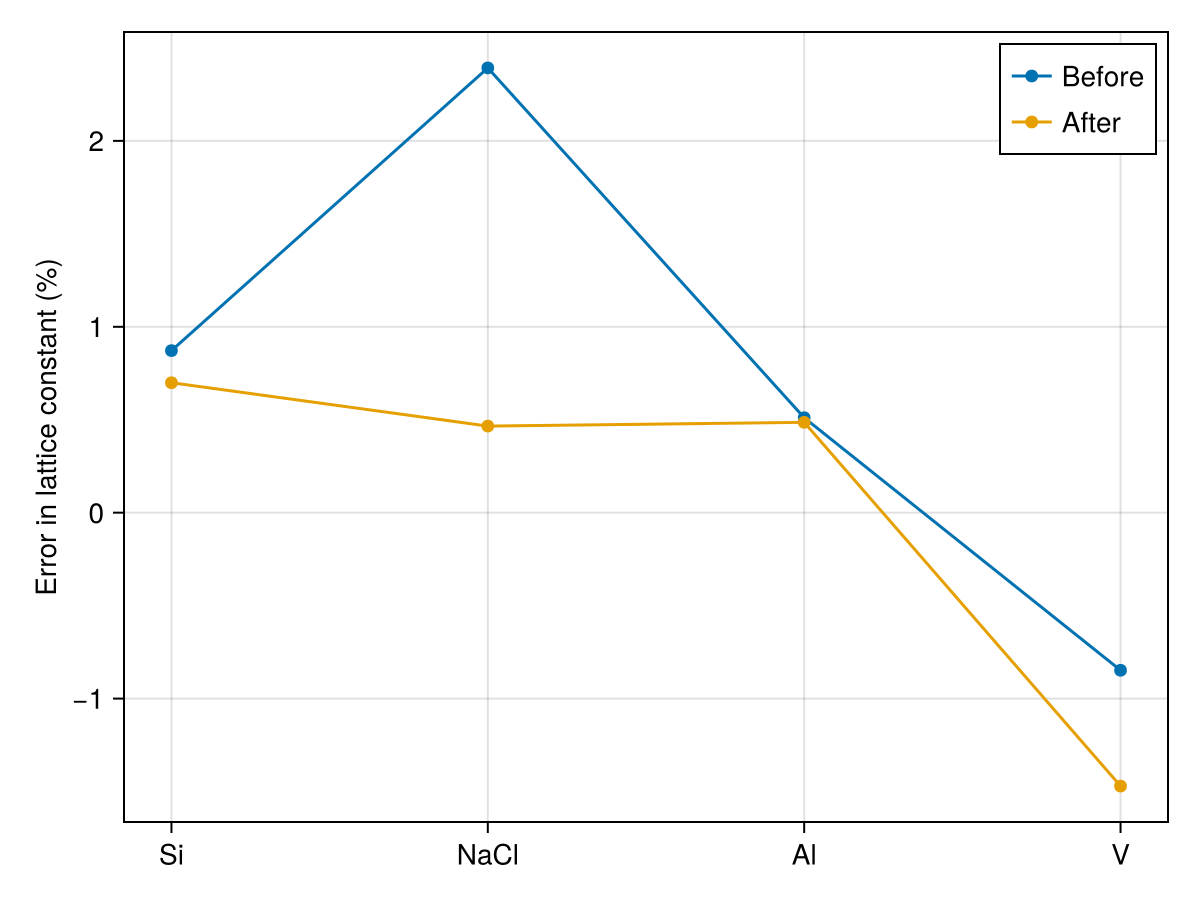

In [11]:
let 
    names = [:Si, :NaCl, :Al, :V]
    error_init = []
    error_post = []
    for name in names
        a0 = a0_exp[String(name)]
        push!(error_init, 100(df[1,   name] - a0) / a0)
        push!(error_post, 100(df[idx, name] - a0) / a0)
    end
    fig = Figure()
    ax = Makie.Axis(fig[1,1], ylabel="Error in lattice constant (%)", xticks=(1:length(names), String.(names)))
    scatterlines!(ax, error_init, label="Before")
    scatterlines!(ax, error_post, label="After")
    axislegend(ax)

    @show mean(abs, error_init)
    @show mean(abs, error_post)

    @show sqrt(mean(abs2, error_init))
    @show sqrt(mean(abs2, error_post))

    fig
end

In [12]:
df[[1, idx], :]

Row,theta,time,loss,Si,NaCl,Al,V
,Array…,String,Float64,Float64,Float64,Float64,Float64
1,"[0.804, 0.219515]",2025-05-19T12:14:07.263,0.000186576,10.3354,10.7679,7.6336,5.66609
2,"[0.527427, 0.222573]",2025-05-21T00:18:27.858,7.76091e-5,10.3177,10.5653,7.63172,5.6305


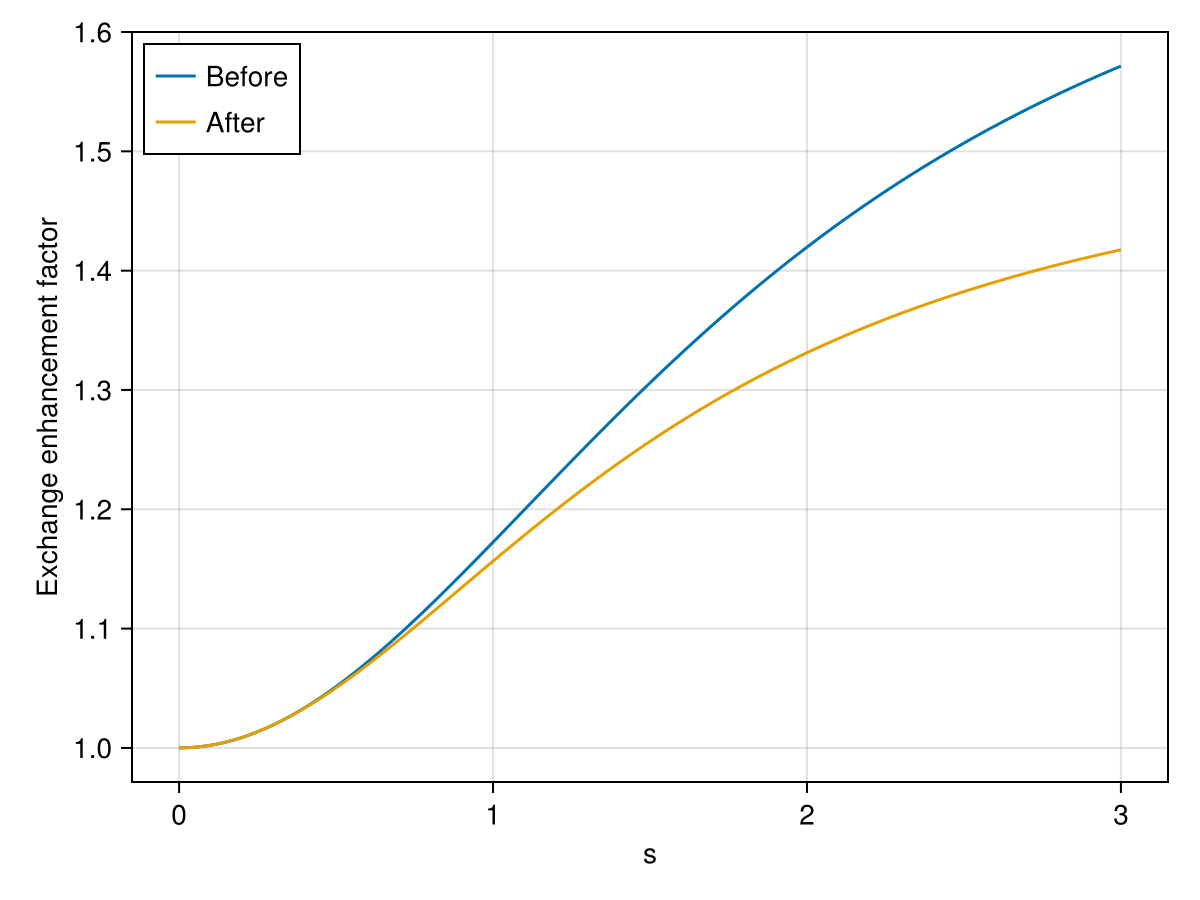

In [13]:
let fig = Figure()
    ax = Makie.Axis(fig[1, 1], xlabel="s", ylabel="Exchange enhancement factor")
    s = range(0, 3, length=100)
    pbe_x_f(s, θ) = 1 + θ.κ - θ.κ^2 / (θ.κ + θ.μ * s^2)
    θ0 = Vector(df[1, :theta])
    θ1 = Vector(df[idx, :theta])
    θ0 = ComponentVector(; κ=θ0[1], μ=θ0[2])
    θ1 = ComponentVector(; κ=θ1[1], μ=θ1[2])
    lines!(ax, s, pbe_x_f.(s, Ref(θ0)), label="Before")
    lines!(ax, s, pbe_x_f.(s, Ref(θ1)), label="After")
    axislegend(ax, position=:lt)
    fig
end

## Summary